# Анализ убытков развлекательного приложения Procrastinate Pro+

Развлекательное приложение Procrastinate Pro+, несмотря на огромные вложения в рекламу, последние несколько месяцев терпит убытки. Необходимо разобраться в причинах и помочь компании выйти в плюс.

**Имеющиеся данные:**
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях:
   * User Id — уникальный идентификатор пользователя,
   * Region — страна пользователя,
   * Device — тип устройства пользователя,
   * Channel — идентификатор источника перехода,
   * Session Start — дата и время начала сессии,
   * Session End — дата и время окончания сессии.

- выгрузка их покупок за этот период:
    * User Id — уникальный идентификатор пользователя,
    * Event Dt — дата и время покупки,
    * Revenue — сумма заказа.
- рекламные расходы:
    * dt — дата проведения рекламной кампании,
    * Channel — идентификатор рекламного источника,
    * costs — расходы на эту кампанию.

Необходимо изучить:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

## Загрузка данных и получение основной информации о них

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)


In [6]:
# Функция вывода характеристик датафрейма
def show_info(df_name):
    display(df_name.info())
    display(df_name.describe())
    display(df_name.head())

In [7]:
# Открываем файлы
try:
    visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # журнал сессий
    pd.read_csv('/datasets/orders_info_short.csv'),  # покупки
    pd.read_csv('/datasets/costs_info_short.csv')  # траты на рекламу
)
    events = None
except:
    visits, orders, costs = (
    pd.read_csv('/home/olga/workspace/yandex_data_analysys_projects/projects//visits_info_short.csv'),  # журнал сессий
    pd.read_csv('/home/olga/workspace/yandex_data_analysys_projects/projects//orders_info_short.csv'),  # покупки
    pd.read_csv('/home/olga/workspace/yandex_data_analysys_projects/projects//costs_info_short.csv') 
)
    events = None   
show_info(visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

User Id
count  3.099010e+05
mean   4.997664e+11
std    2.887899e+11
min    5.993260e+05
25%    2.493691e+11
50%    4.989906e+11
75%    7.495211e+11
max    9.999996e+11

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [8]:
show_info(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

User Id       Revenue
count  4.021200e+04  40212.000000
mean   4.990295e+11      5.370608
std    2.860937e+11      3.454208
min    5.993260e+05      4.990000
25%    2.511324e+11      4.990000
50%    4.982840e+11      4.990000
75%    7.433327e+11      4.990000
max    9.998954e+11     49.990000

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

In [9]:
show_info(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max     630.000000

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

**Промежуточный вывод:** Первичный анализ показывает, что пропусков в данных нет. Видны названия столбцов, которые необходимо привести к единообразному виду. Таблица describe дает первичное представление о средних, квартильных, максимальных и минимальных значениях, среднеквадратическом октлонении.

## Предобработка данных 

Поработаем с названиями столбцов. Проверим данные на явные дубликаты. Изменим тип данных некоторых столбцов  для удобства дальнейшего анализа.

### Изменение названия столбцов и поиск явных дубликатов

In [10]:
# Преобразуем названия столбцов к нижнему регистру и заменим пробел на нижнее подчеркивание. 
# Выведем названия столбцов
visits.columns = [x.replace(' ', '_').lower() for x in visits.columns]
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [11]:
orders.columns = [x.replace(' ', '_').lower() for x in orders.columns]
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [12]:
costs.columns = costs.columns.str.lower()
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

In [13]:
#Проверим, есть ли явные дубликаты в таблице
visits.duplicated().sum()

0

In [14]:
orders.duplicated().sum()

0

In [15]:
costs.duplicated().sum()

0

**Промежуточный вывод:** Привели все названия столбцов к нижнему регистру, проверили есть ли в таблице явные дубликаты строк - их не оказалось.

### Изменение типов данных и получение уникальных данных столбцов

In [16]:
# Преобразуем данные с временем
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 


In [17]:
# Получим уникальные значения столбцов таблицы visits [region, device, channel] и их количество
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [18]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [19]:
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

In [20]:
# Получим уникальные значения столбцов таблицы costs [channel] и их количество
costs.channel.value_counts()

FaceBoom              180
MediaTornado          180
RocketSuperAds        180
TipTop                180
YRabbit               180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180
Name: channel, dtype: int64

**Промежуточный вывод:** Изменили тип данных в столбцах с датами. Ознакомились с уникальными значениями устройств (4 типа), стран (4) и каналов (10).

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.


Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Функция get_profiles() — для создания профилей пользователей

In [21]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

### Функция get_retention() — для подсчёта Retention Rate

In [22]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция get_conversion() — для подсчёта конверсии

In [23]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


### Функция get_ltv() — для подсчёта LTV

In [24]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Функция filter_data() — для сглаживания данных

In [25]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Функция plot_retention() — для построения графика Retention Rate

In [26]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### Функция plot_conversion() — для построения графика конверсии

In [27]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Функция plot_ltv_roi — для визуализации LTV и ROI.

In [28]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**Промежуточный вывод:** Написаны необходимые для дальнейшего анализа функции.

## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [29]:
profiles = get_profiles(visits, orders, events, costs)
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt               month  payer  acquisition_cost  
0  2019-05-07 2019-05-07 20:58:57   True          1.088172  
1  2019-07-09 2019-07-09 12:46:07  False          1.107237  
2  2019-10-01 2019-10-01 09:58:33  False          0.000000  
3  2019-08-22 2019-08-22 21:35:48  False          0.988235  
4  2019-10-02 2019-10-02 00:07:44  False          0.230769

In [30]:
# минимальная дата привлечения пользователей
min_analysis_date = profiles['dt'].min()
min_analysis_date

datetime.date(2019, 5, 1)

In [31]:
# момент анализа, согласно техническому заданию
observation_date = datetime(2019, 11, 1).date()
observation_date

datetime.date(2019, 11, 1)

In [32]:
# горизонт анализа
analysis_horizon = 14
# максимально возможная дата привлечения с учётом горизонта
max_analysis_date = observation_date - timedelta(days=analysis_horizon - 1)
max_analysis_date

datetime.date(2019, 10, 19)

**Промежуточный вывод:** Минимальная дата привлечения пользователей 1.05.2019, момент наблюдения и горизонт анализа, согласно заданию, равны 1.11.2019 и 14 дней соответственно, максимально возможная дата привлечения с учётом горизонта равна 19.10.2019.

###  Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [33]:
# сгруппируем таблицу с профилями по регионам
region = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'sum'})
region['payer_%'] = region['payer']*100/region['user_id']
region.sort_values('payer_%')

user_id  payer   payer_%
region                                 
France           17450    663  3.799427
UK               17575    700  3.982930
Germany          14981    616  4.111875
United States   100002   6902  6.901862

**Промежуточный вывод:** Приложением пользуются больше всего пользователи из четырех стран (Франция, Германия, Великобритания и США). Самое большое количество пользователей в США - 100002, на втором месте Франци и Германия, на третьем Великобритания. Самая большая доля платящих пользователей приходится так же на США.

###  Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [34]:
# сгруппируем таблицу с профилями по устройствам
device = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'sum'})
device['payer_%'] = device['payer']*100/device['user_id']
device.sort_values('payer_%')

user_id  payer   payer_%
device                           
PC         30455   1537  5.046790
Android    35032   2050  5.851793
iPhone     54479   3382  6.207897
Mac        30042   1912  6.364423

**Промежуточный вывод:** Устройств, на которых используется приложение четыре типа. Наиболее популярным устроиство, на котором используется приложение, является iPhone, на втором месте - Android	. на третьем - Mac и PC. Максимальная доля платящих пользователей, использующих МАС.

### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [35]:
# сгруппируем таблицу с профилями по каналам
channel = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'})
channel['payer_%'] = channel['payer']*100/channel['user_id']
channel.sort_values('user_id')

user_id  payer    payer_%
channel                                      
lambdaMediaAds         2149    225  10.469986
AdNonSense             3880    440  11.340206
YRabbit                4312    165   3.826531
MediaTornado           4364    156   3.574702
RocketSuperAds         4448    352   7.913669
LeapBob                8553    262   3.063253
WahooNetBanner         8553    453   5.296387
OppleCreativeMedia     8605    233   2.707728
TipTop                19561   1878   9.600736
FaceBoom              29144   3557  12.204914
organic               56439   1160   2.055316

**Промежуточный вывод:** Всего 10 рекламных источников. Максимальное количество пользователей пришли самостоятельно (не с рекламных каналов), минимальная - с рекламного канала lambdaMediaAds. Максимальная доля платящих пользователей пришли с рекламного канала FaceBoom, минимальная доля - пришедшие самостоятельно, без рекламы.	

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

### Общая сумма расходов на маркетинг

In [36]:
#Общая сумма раскодов на всех 10 каналах
profiles['acquisition_cost'].sum().round(1)

105497.3

###  Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [37]:
#Общая сумма расходов для разных регионов
profiles.groupby('region')['acquisition_cost'].sum().round(1)

region
France            5076.0
Germany           4424.2
UK                5068.5
United States    90928.6
Name: acquisition_cost, dtype: float64

In [38]:
# Сделаем группировка по каналам
profiles.groupby('channel').agg({'acquisition_cost':'sum'}).sort_values('acquisition_cost').round(1)

acquisition_cost
channel                             
organic                          0.0
YRabbit                        944.2
MediaTornado                   954.5
lambdaMediaAds                1557.6
LeapBob                       1797.6
RocketSuperAds                1833.0
OppleCreativeMedia            2151.2
AdNonSense                    3911.2
WahooNetBanner                5151.0
FaceBoom                     32445.6
TipTop                       54751.3

In [39]:
# Сделаем группировка по каналам и регионам.
profiles.groupby(['channel','region']).agg({'acquisition_cost':'sum'}).sort_values('acquisition_cost').round(1)

acquisition_cost
channel            region                         
organic            United States               0.0
                   Germany                     0.0
                   France                      0.0
                   UK                          0.0
lambdaMediaAds     Germany                   471.3
LeapBob            Germany                   529.9
lambdaMediaAds     France                    535.1
                   UK                        551.2
LeapBob            France                    628.0
                   UK                        639.6
OppleCreativeMedia Germany                   640.7
                   France                    747.3
                   UK                        763.2
YRabbit            United States             944.2
MediaTornado       United States             954.5
AdNonSense         Germany                  1229.3
                   UK                       1305.7
                   France                   1376.3
WahooNetBanner     Germany                  1553.0
                   France                   1789.1
                   UK                       1808.9
RocketSuperAds     United States            1833.0
FaceBoom           United States           32445.6
TipTop             United States           54751.3

In [40]:
# Отделим страны разных континентов, те Америку и страны Европы
# для этого напишем функцию и добавим новый столбец

In [41]:
def categorize_region(region):
    try:
        if 'UK' in region or 'France' in region or 'Germany' in region:
            return 'Europe'
        else:
            return 'United States'
    except:
        pass

In [42]:
profiles['macro_region'] = profiles['region'].apply(categorize_region)

In [43]:
#Общая сумма расходов на двух континентах
profiles.groupby('macro_region')['acquisition_cost'].sum().round(1)

macro_region
Europe           14568.7
United States    90928.6
Name: acquisition_cost, dtype: float64

In [44]:
# Сделаем группировка по каналам и континентам.
profiles.groupby(['channel','macro_region']).agg({'acquisition_cost':'sum'}).sort_values('acquisition_cost').round(1)

acquisition_cost
channel            macro_region                   
organic            Europe                      0.0
                   United States               0.0
YRabbit            United States             944.2
MediaTornado       United States             954.5
lambdaMediaAds     Europe                   1557.6
LeapBob            Europe                   1797.6
RocketSuperAds     United States            1833.0
OppleCreativeMedia Europe                   2151.2
AdNonSense         Europe                   3911.2
WahooNetBanner     Europe                   5151.0
FaceBoom           United States           32445.6
TipTop             United States           54751.3

**Промежуточный вывод:** Общая сумма расходов составила 105497$. Расчет трат на рекламу по регионам показал, что Европейские страны тратят примерно одинаковые суммы, которые примерно в 20 раз меньше трат на рекламу в Америке. Поэтому было принято решение сделать группировку данных по макро регионам (Европа и Америка). Такая группировка показала, что расходы на рекламу в Америке в 6.5р больше, чем в Европе. Так же показала, что у каждого макро региона различные источники рекламы. Самые большие траты пришлись на источник TipTop и FaceBoom - оба источника используются только в Америке. Самые минимальные затраты (не считая естественных источников organic) пришлись на источники YRabbit и MediaTornado - оба источника используются только в Америке. Для Европейских стран самые большие траты пошли на источник WahooNetBanner, а самые маленькие на lambdaMediaAds.  

### Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

In [45]:
# Добавим в таблицу profiles новый столбец с номером недели
profiles['week'] = profiles['first_ts'].dt.isocalendar().week
profiles.head(1)

user_id            first_ts   channel device         region          dt  \
0   599326 2019-05-07 20:58:57  FaceBoom    Mac  United States  2019-05-07   

                month  payer  acquisition_cost   macro_region  week  
0 2019-05-07 20:58:57   True          1.088172  United States    19

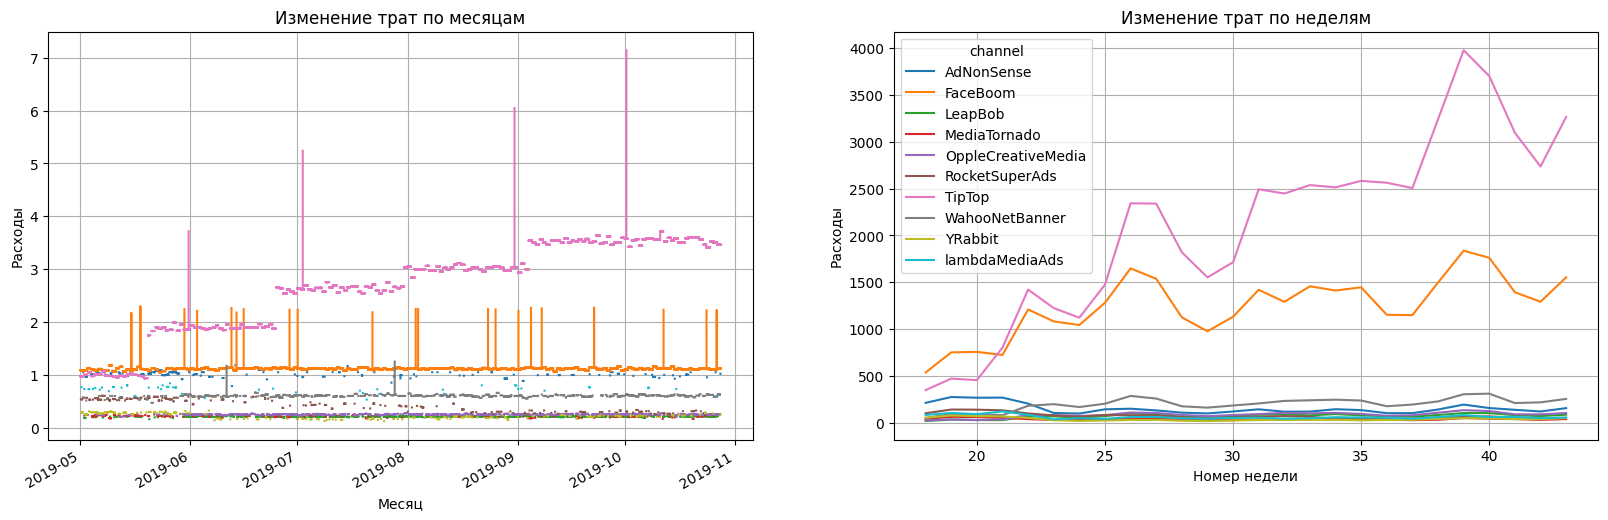

In [46]:
#Построим динамику изменения расходов с разбивкой по месяцам и неделям
plt.figure(figsize=(20, 6))
profiles.query("channel!='organic'").pivot_table(
    index='month', 
    columns='channel',  
    values='acquisition_cost',  
    aggfunc='sum'
).plot(grid=True, ax=plt.subplot(1, 2, 1), legend = False)
plt.title('Изменение трат по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы')


profiles.query("channel!='organic'").pivot_table(
    index='week', 
    columns='channel',  
    values='acquisition_cost',  
    aggfunc='sum'
).plot(grid=True, ax=plt.subplot(1, 2, 2))
plt.title('Изменение трат по неделям')
plt.xlabel('Номер недели')
plt.ylabel('Расходы')
plt.show()

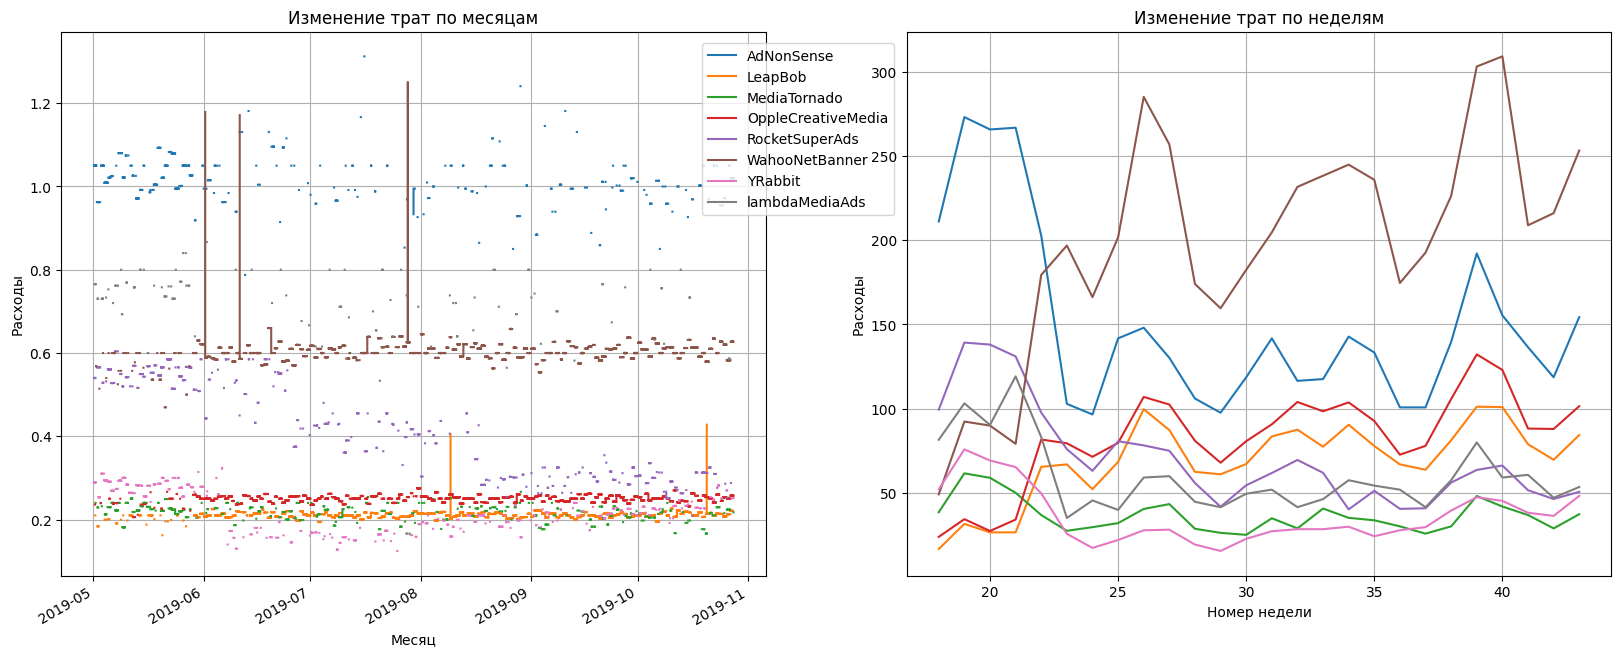

In [47]:
#Уберем два самых "затратных" источник, чтобы нагляднее рассмотреть остальные
#Построим динамику изменения расходов с разбивкой по месяцам и неделям
plt.figure(figsize=(20, 8))
profiles.query("channel!='organic' and channel!='TipTop' and channel!='FaceBoom'").pivot_table(
    index='month', 
    columns='channel',  
    values='acquisition_cost',  
    aggfunc='sum'
).plot(grid=True, ax=plt.subplot(1, 2, 1))
plt.legend(bbox_to_anchor=(0.9, 0.65))
plt.title('Изменение трат по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы')

profiles.query("channel!='organic' and channel!='TipTop' and channel!='FaceBoom'").pivot_table(
    index='week', 
    columns='channel',  
    values='acquisition_cost',  
    aggfunc='sum'
).plot(grid=True, ax=plt.subplot(1, 2, 2), legend = False)
plt.title('Изменение трат по неделям')
plt.xlabel('Номер недели')
plt.ylabel('Расходы')
plt.show()

**Промежуточный вывод:** Первичный графики изменения трат в разбивке по месяцам и неделям показали, что для двух лидеров трат на рекламу (TipTop  и FaceBoom) с каждым месяцем/неделей траты росли. На вторичной группе графиков лидеры были удалены, для рекламного источника WahooNetBanner траты по месяцам/неделям стабильно росли (основной скачок бы в июне), для источников OppleCreativeMedia и LeapBob	траты выросли в июне и в дальнейшем оставались на том же самом уровне. Для источника AdNonSense в июне (23 неделя) произошло двухкратное падение трат, в дальнейшем траты оставались на одном уровне. Так же для источников RocketSuperAds, lambdaMediaAds, YRabbit и MediaTornado так же было падение трат в 2-3 раза в июне и в дальнейшем траты оставались неизменными (с небольшими скачками, видными на графике с недельной разбивкой).

###  Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

* CAC (Customer Acquisition Cost) — стоимость привлечения одного клиента. 
* LTV (Lifetime Value) — это общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок.
* ROI (Return On Investment) — окупаемость инвестиций. Эта метрика показывает, на сколько процентов LTV превысил CAC.

In [48]:
# Применим функцию get_ltv для получения таблицы ltv_raw
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
     profiles, orders, observation_date, analysis_horizon, dimensions=['channel']
)
ltv_raw.head(2)

user_id            first_ts   channel device         region          dt  \
0   599326 2019-05-07 20:58:57  FaceBoom    Mac  United States  2019-05-07   
1   599326 2019-05-07 20:58:57  FaceBoom    Mac  United States  2019-05-07   

                month  payer  acquisition_cost   macro_region  week  \
0 2019-05-07 20:58:57   True          1.088172  United States    19   
1 2019-05-07 20:58:57   True          1.088172  United States    19   

             event_dt  revenue  lifetime  
0 2019-05-07 20:59:09     4.99       0.0  
1 2019-05-08 06:01:28     4.99       0.0

In [49]:
len(profiles.groupby('dt').agg({'user_id': 'nunique'}))

180

In [50]:
# Найдем максимальную дату привлечения из сырых данных LTV
max_acquitision_dt = ltv_raw['dt'].max()
# отсекаем профили, которые «старше» этой даты
ltv_profiles = profiles.query('dt <= @max_acquitision_dt')
# оставшееся число пользователей на каждый лайфтайм
len(ltv_profiles.groupby('dt').agg({'user_id': 'nunique'}))

172

In [51]:
# Рассчитаем средний CAC по всему проекту 
cac = (ltv_profiles.agg({'acquisition_cost': 'mean'}))
round(cac, 2)

acquisition_cost    0.69
dtype: float64

In [52]:
# Рассчитаем средний CAC по каждому каналу привлечения. 
# Для этого сгруппируем отфильтрованные профили и применим функцию mean() к значениям столбца acquisition_cost. 
# Сохраним результат в переменную cac, 
cac = (
    ltv_profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
)
cac.sort_values('cac')

cac
channel                     
organic             0.000000
LeapBob             0.210000
YRabbit             0.217087
MediaTornado        0.219035
OppleCreativeMedia  0.249908
RocketSuperAds      0.417431
WahooNetBanner      0.601856
lambdaMediaAds      0.727237
AdNonSense          1.008023
FaceBoom            1.113419
TipTop              2.757774

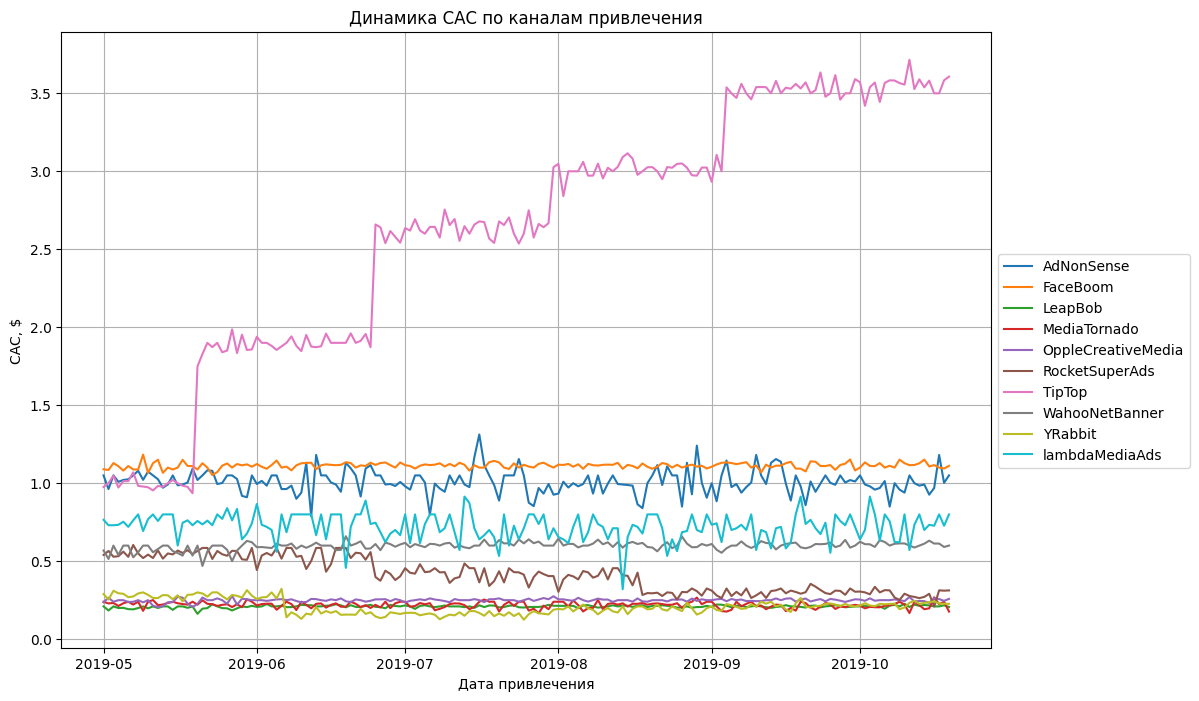

In [53]:
# Построим динамику распределения САС по каналам
ltv_profiles.query("channel!='organic'").pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(12, 8))
plt.legend(bbox_to_anchor=(1.0, 0.65))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

**Промежуточный вывод:** Средняя стоимость привлечения одного клиента равна 0.69$. Для всех каналов средние стоимости привлечения одного клиента оставались на одном уровне на протяжении всего анализируемого периода, кроме канала TipTop. Для этого канала средняя стоимость с каждым месяцем увеличивалась. Самые маленькие траты привелечения у канала LeapBob, самые большие у TipTop.

## Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### Проанализируйем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

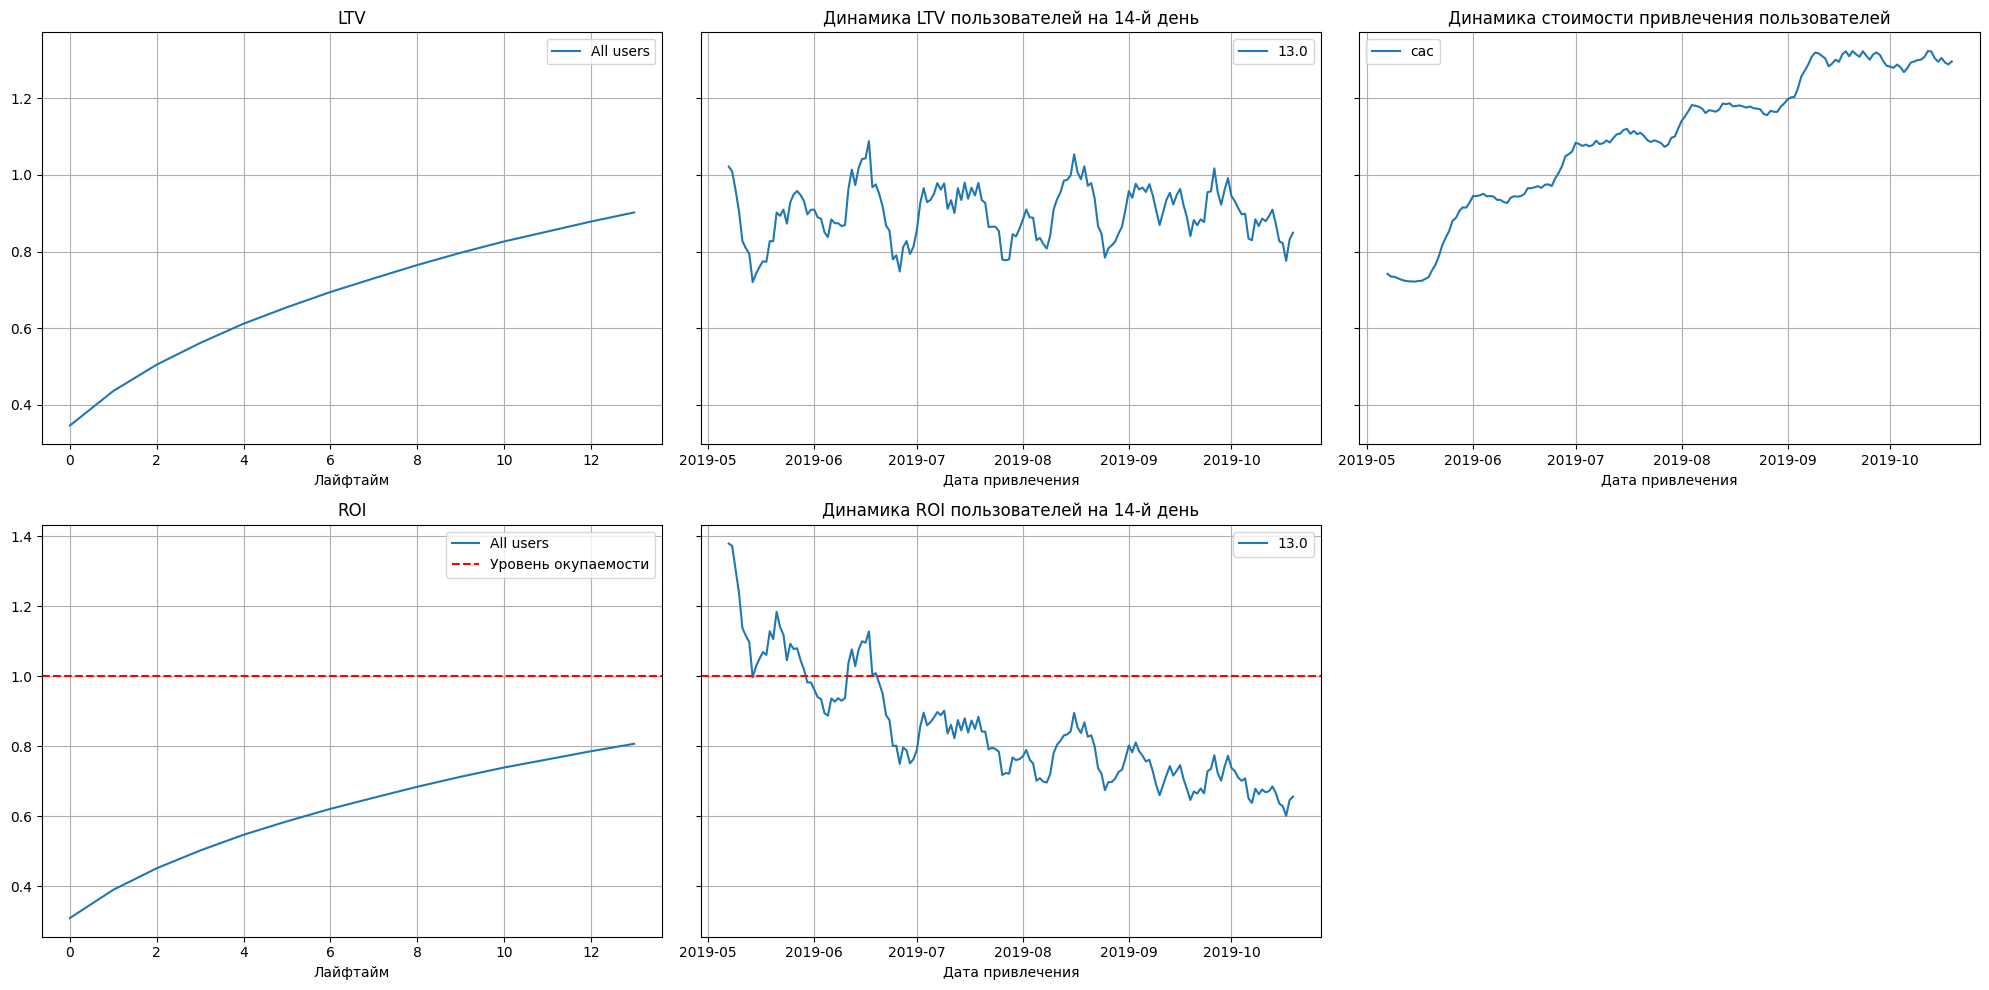

In [54]:
# Исключим органических пользователей из таблицы с профилями
profiles = profiles.query("channel!='organic'")
# Получим таблицы LTV и ROI без разделения по признаку
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
     profiles, orders, observation_date, analysis_horizon, dimensions=[]
)
# Построим графики  
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon) 

**Промежуточный вывод:** Графики показывают, что реклама в целом не окупается, коэффициент ROI к концу исследуемого периода не превысил 0,8 (80%), не смотря на то, что траты на рекламу CAC постоянно растут. LTV так же стабильно по немногу растет.

### Проверим конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

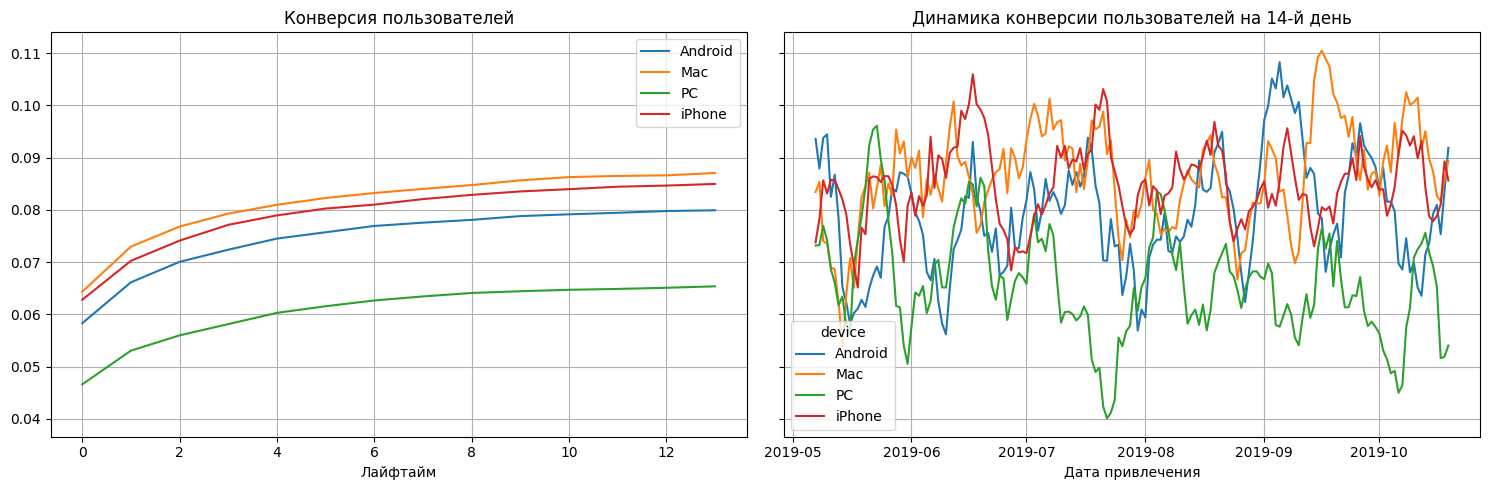

In [55]:
# Конверсия и динамика конверсии с разделением по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon) 

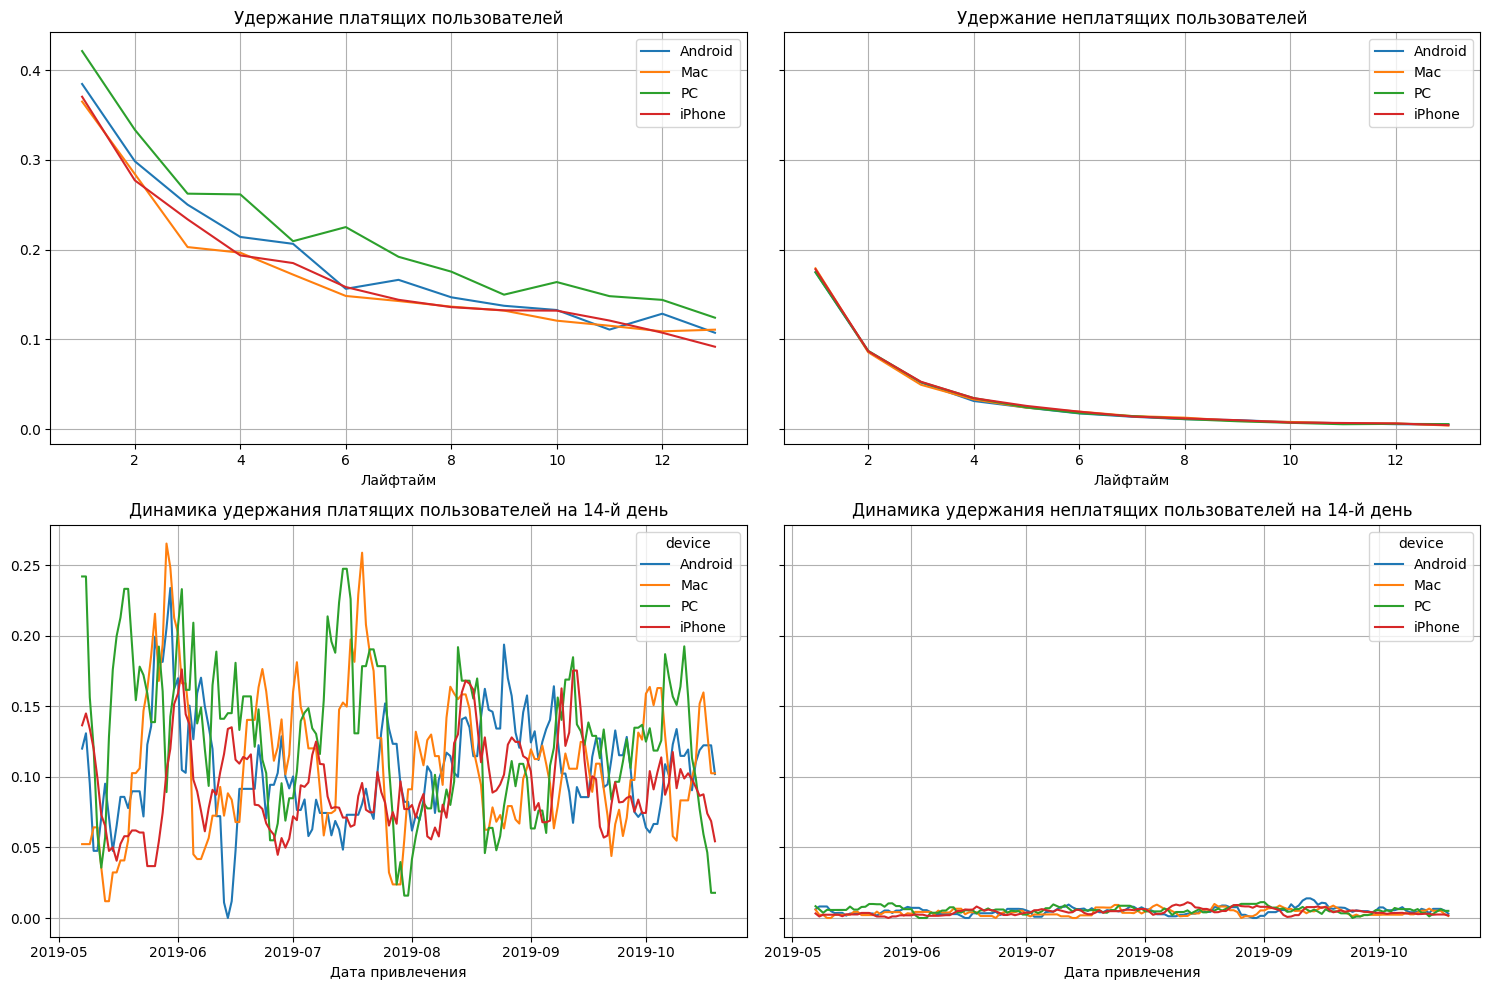

In [56]:
# Удержание с разделением по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

**Промежуточный вывод:** Пользователи PC значительно хуже конвертируются, чем пользователи остальных устройств, однако удержание платящих пользователей PC устрйоств выше остальных.

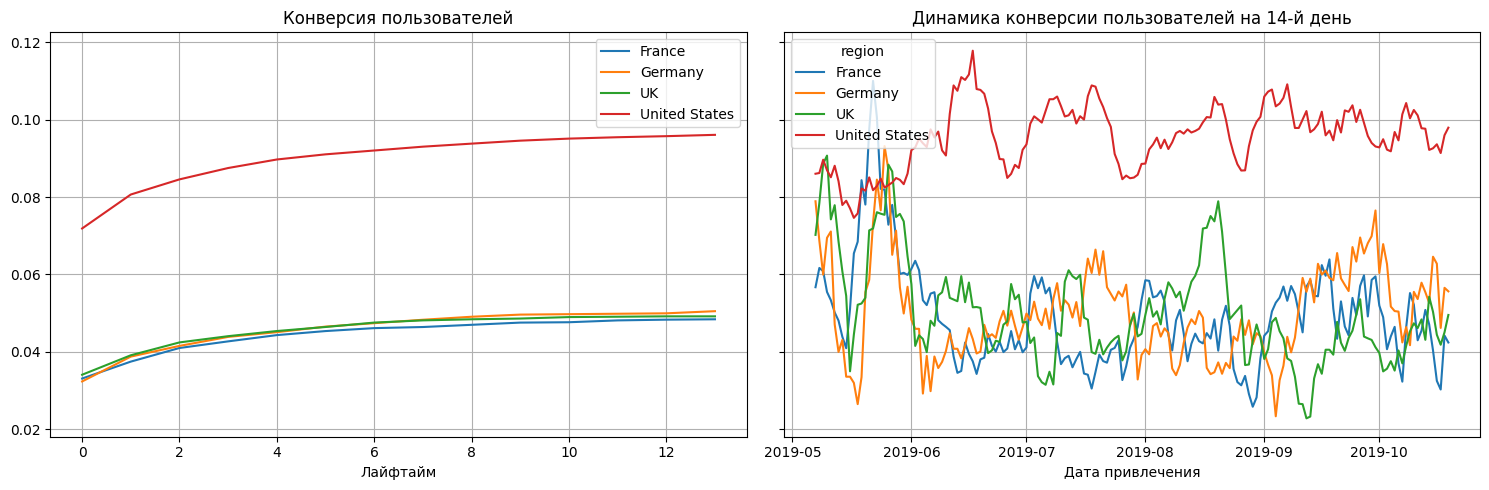

In [57]:
# Конверсия и динамика конверсии с разделением по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon) 

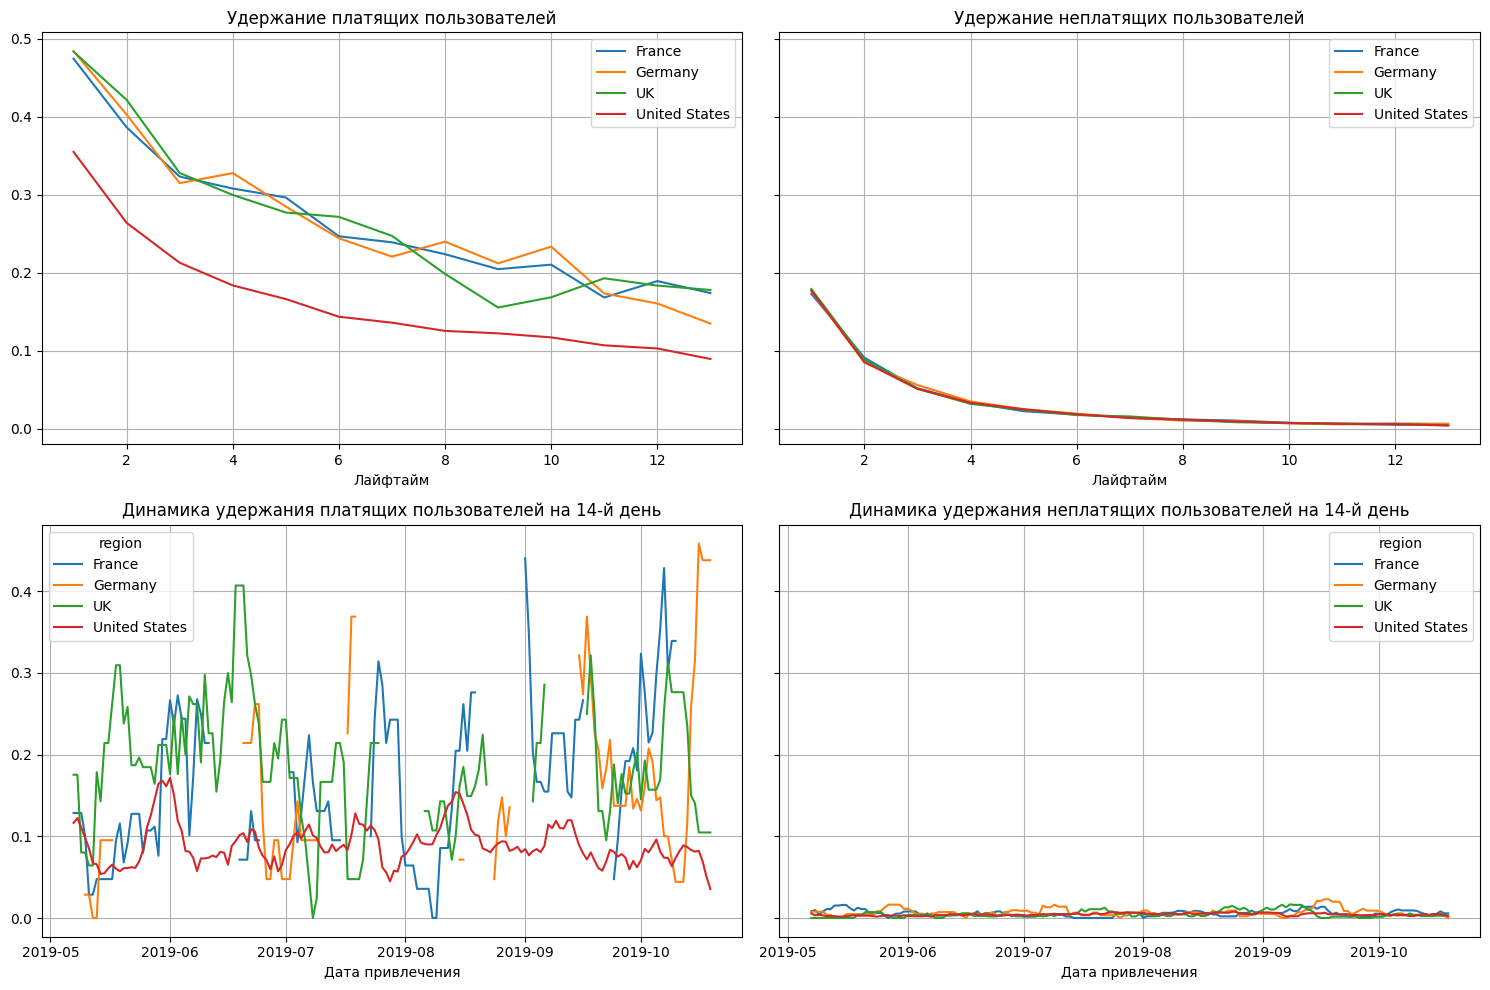

In [58]:
# Удержание с разделением по странам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

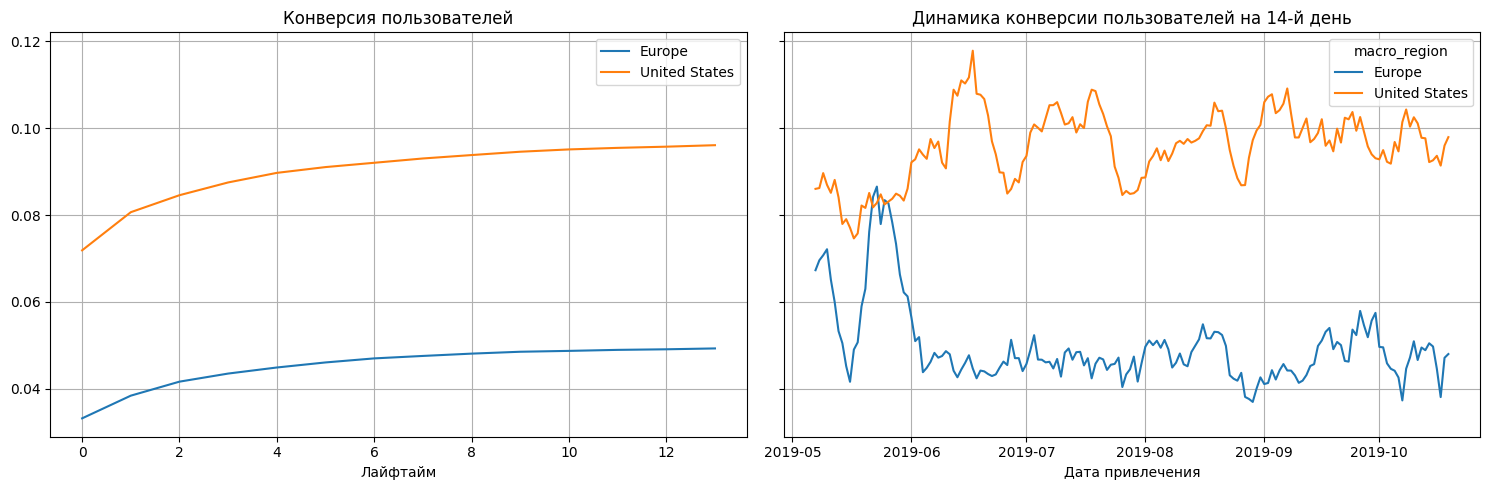

In [59]:
# Конверсия и динамика конверсии с разделением по макро регионам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=['macro_region']
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon) 

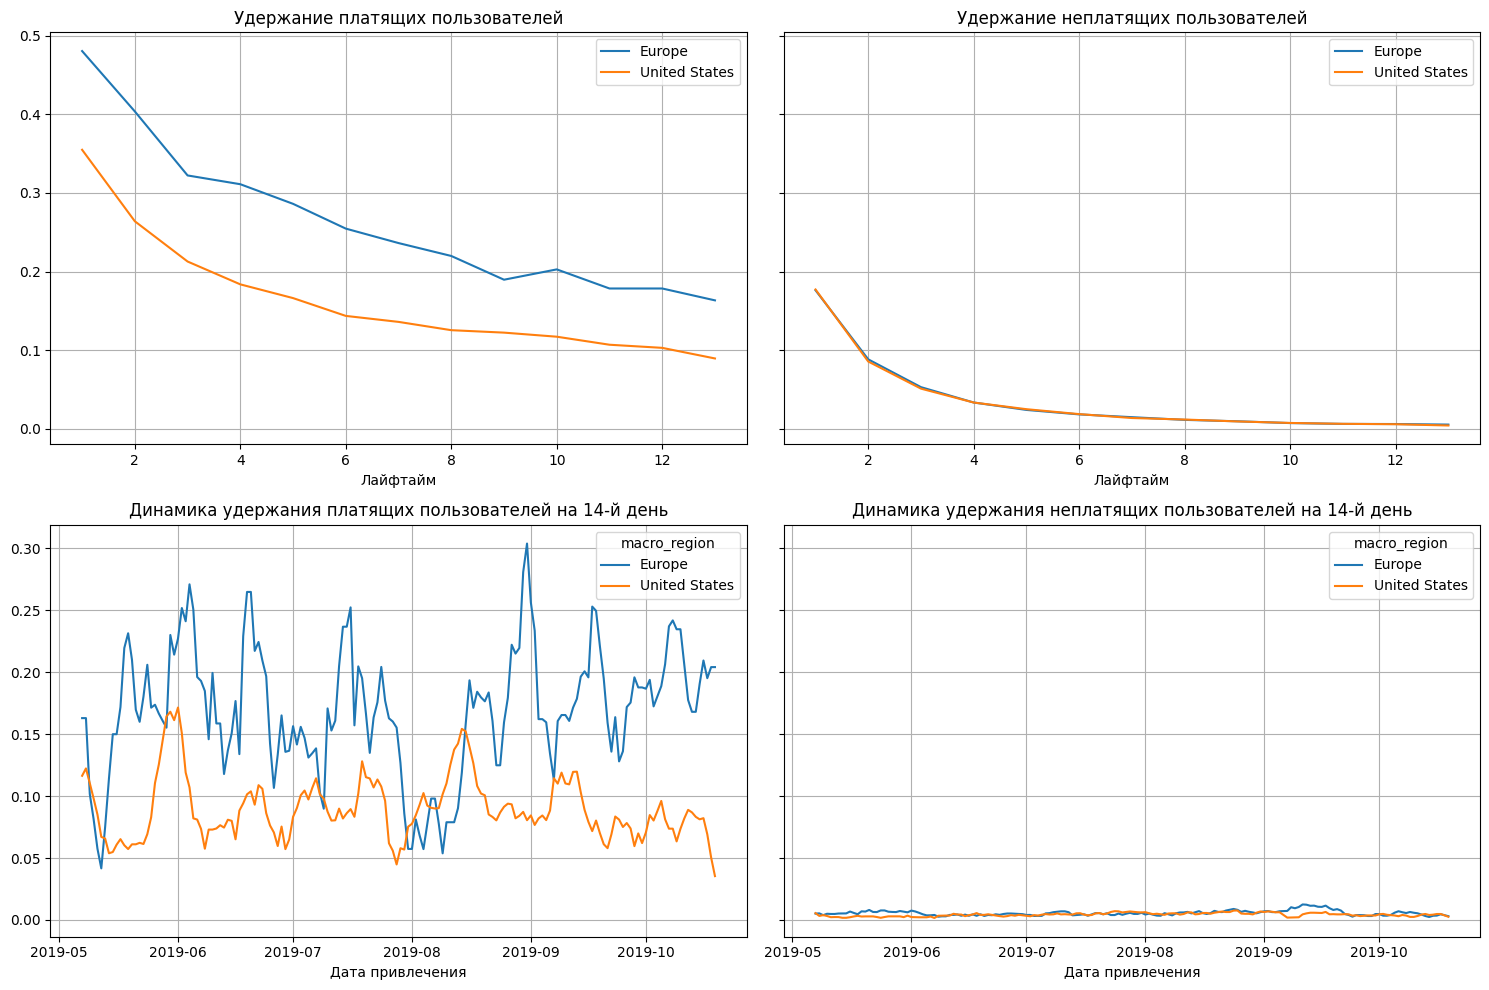

In [60]:
# Удержание с разделением по по макро регионам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=['macro_region']
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

**Промежуточный вывод:** Пользователи из Америки конвертируются намного лучше, чем пользоватлеи Европеских стран, в то же время в удержании проигрывают.

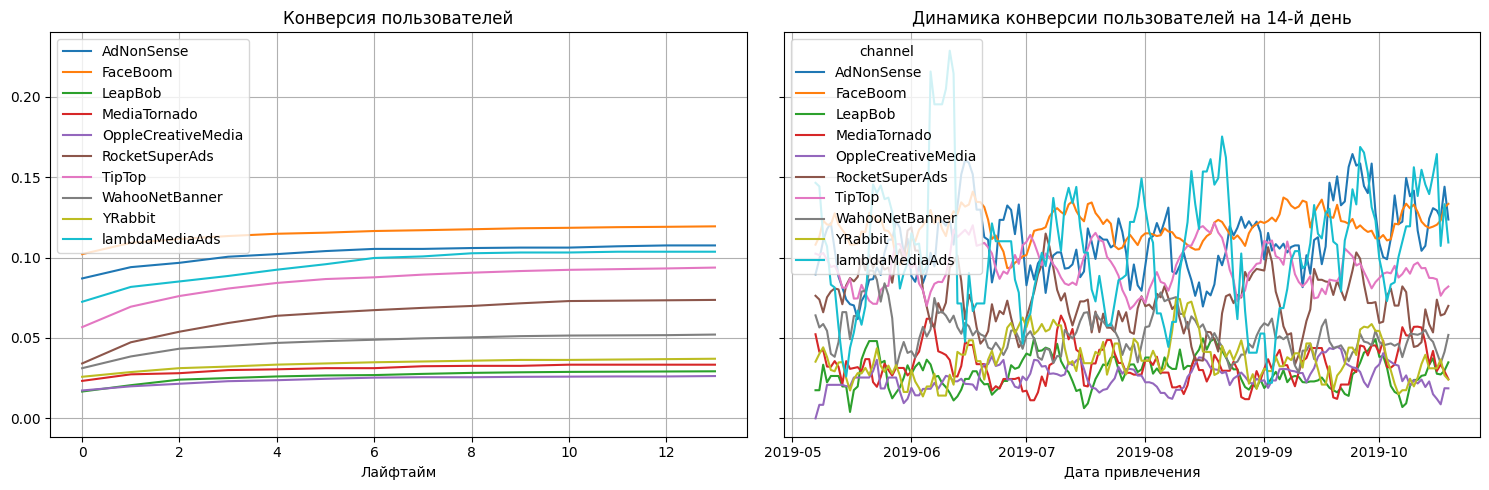

In [61]:
# Конверсия и динамика конверсии с разделением по каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon) 

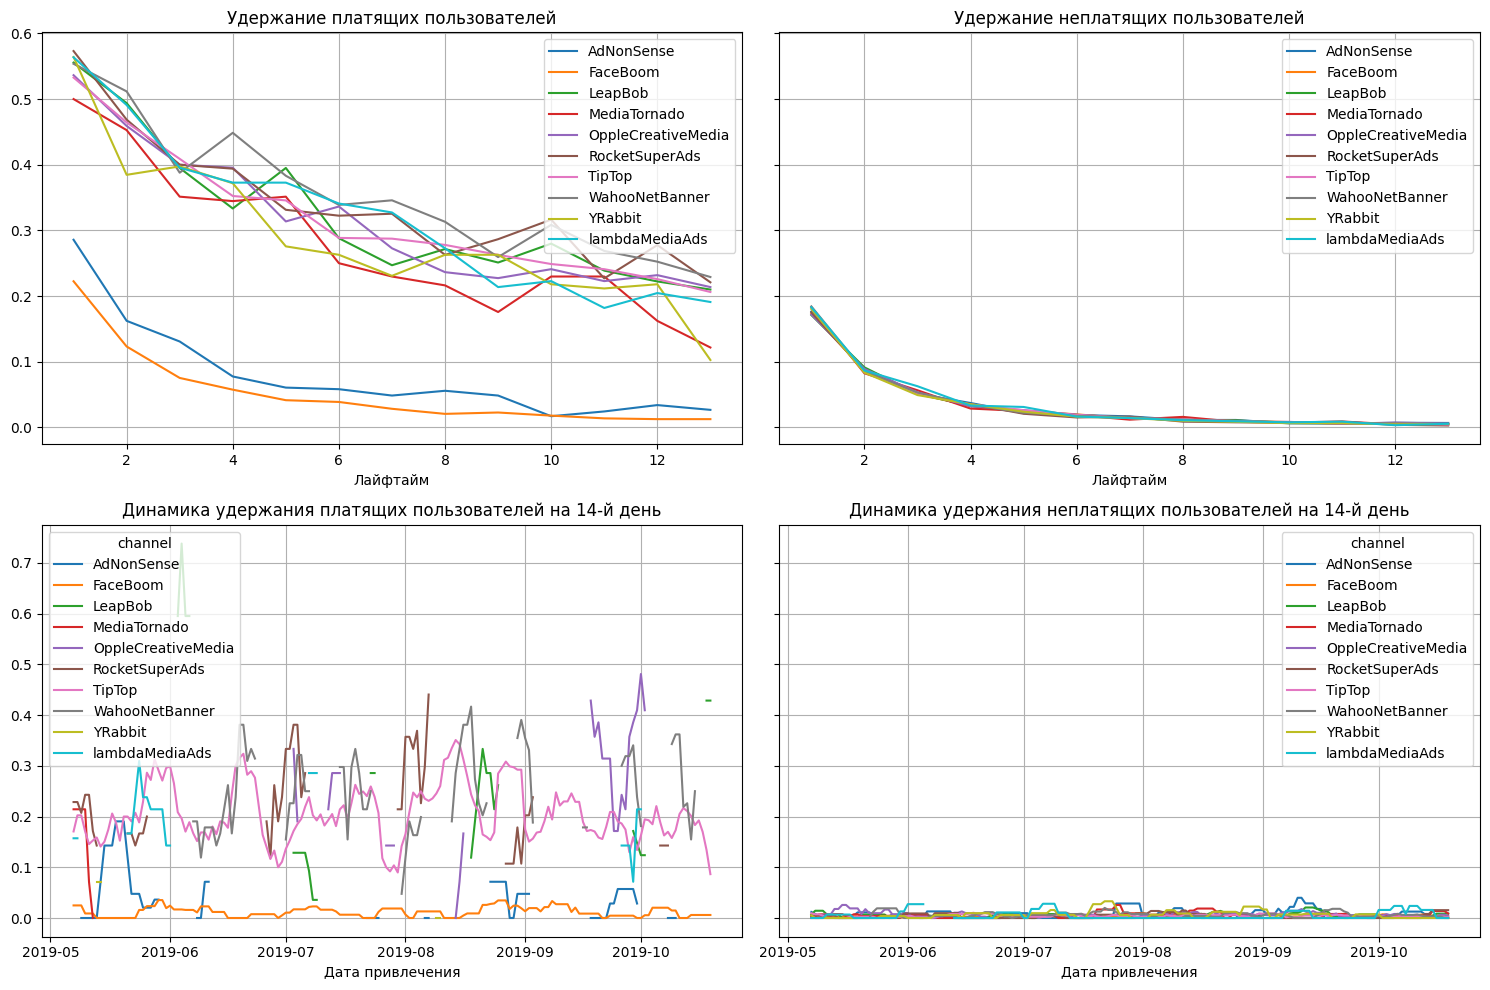

In [62]:
# Удержание с разделением по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

**Промежуточный вывод:** Лидирующие позиции по конверсии занимаются каналы AdNonSense, FaceBoom и TipTop. В удержании хуже всех проявляют себя каналы  FaceBoom и AdNonSense.

### Проанализируем окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

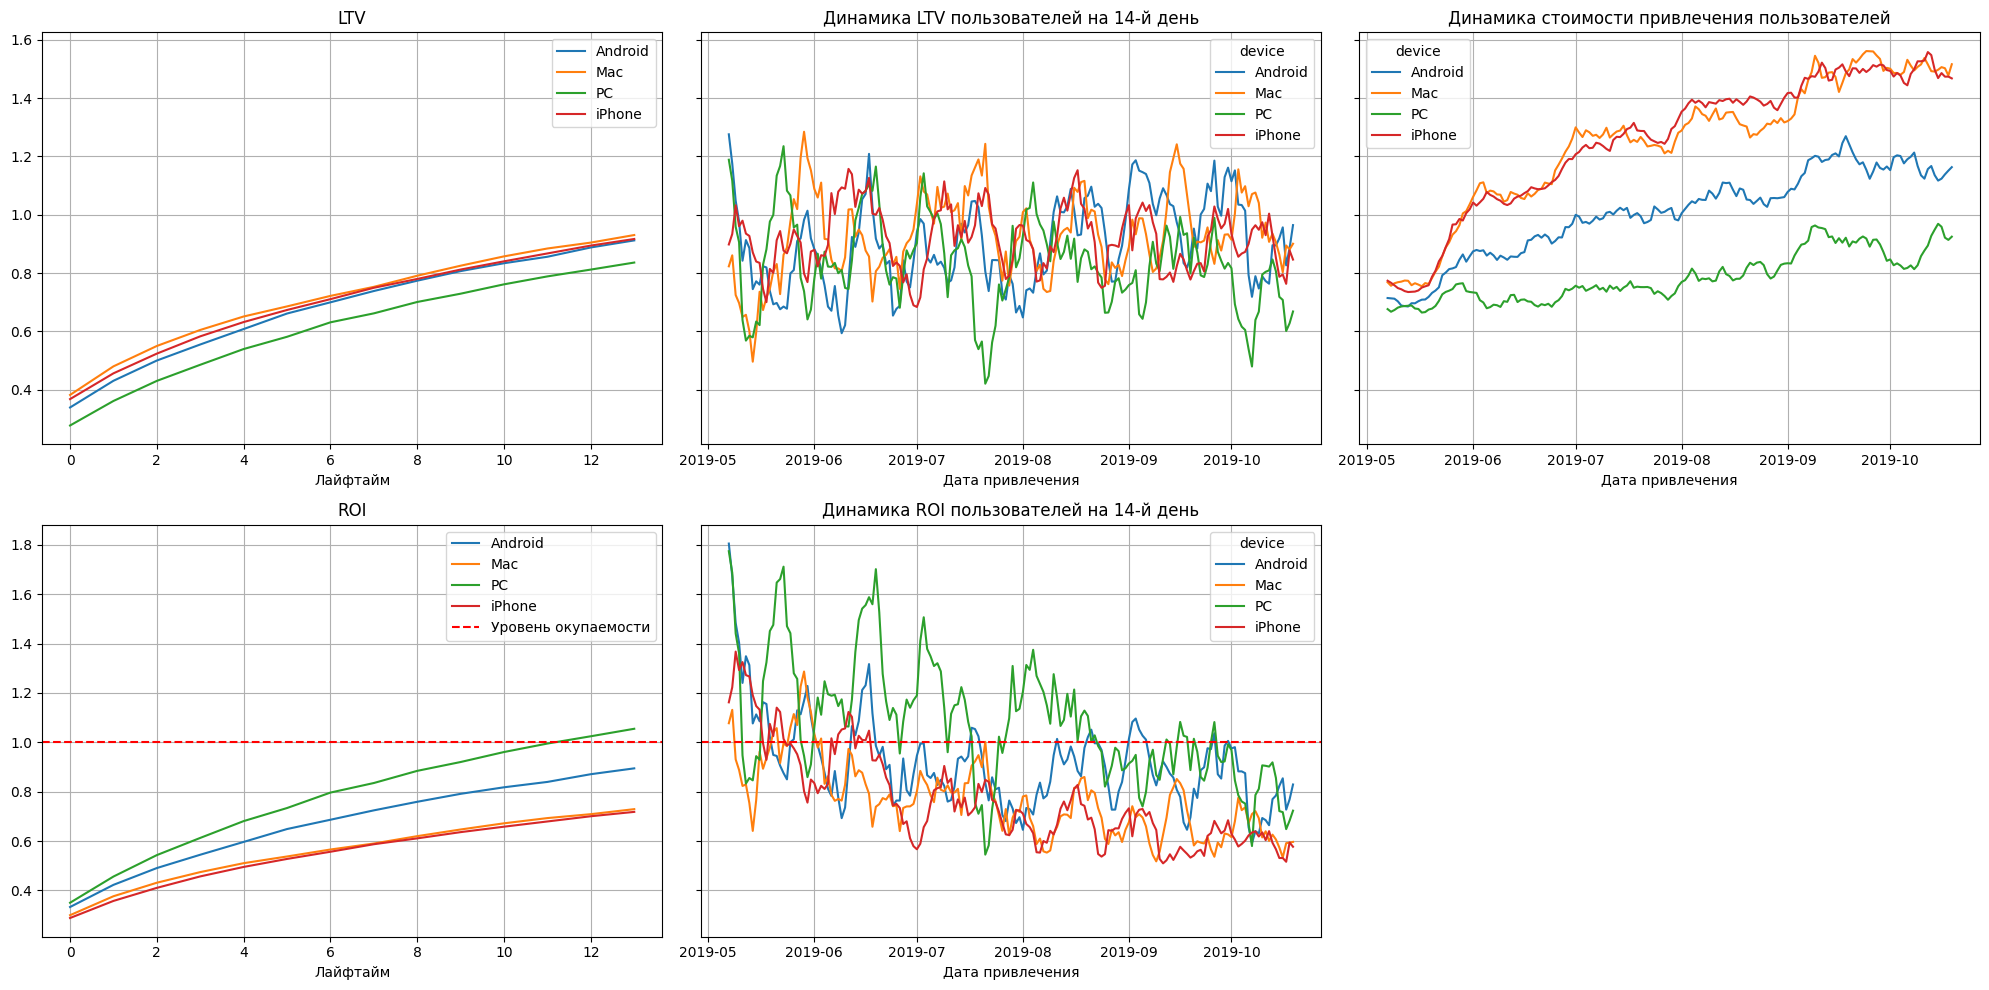

In [63]:
# Получим таблицы LTV и ROI c разделением по устройствам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
     profiles, orders, observation_date, analysis_horizon, dimensions=['device']
)
# Построим графики  
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon) 

**Промежуточный вывод:** Из графиков видно, что реклама окупается только для пользователей устройства PC, несмотря на то, что траты на рекламу для этих устройств меньше остальных. Самые большие траты для устройств Iphone и MAC, а окупаемость на этих устройствах не превысила 80%.  На графике заметно снижение динамики ROI у всех устройств.

### Проанализируем окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

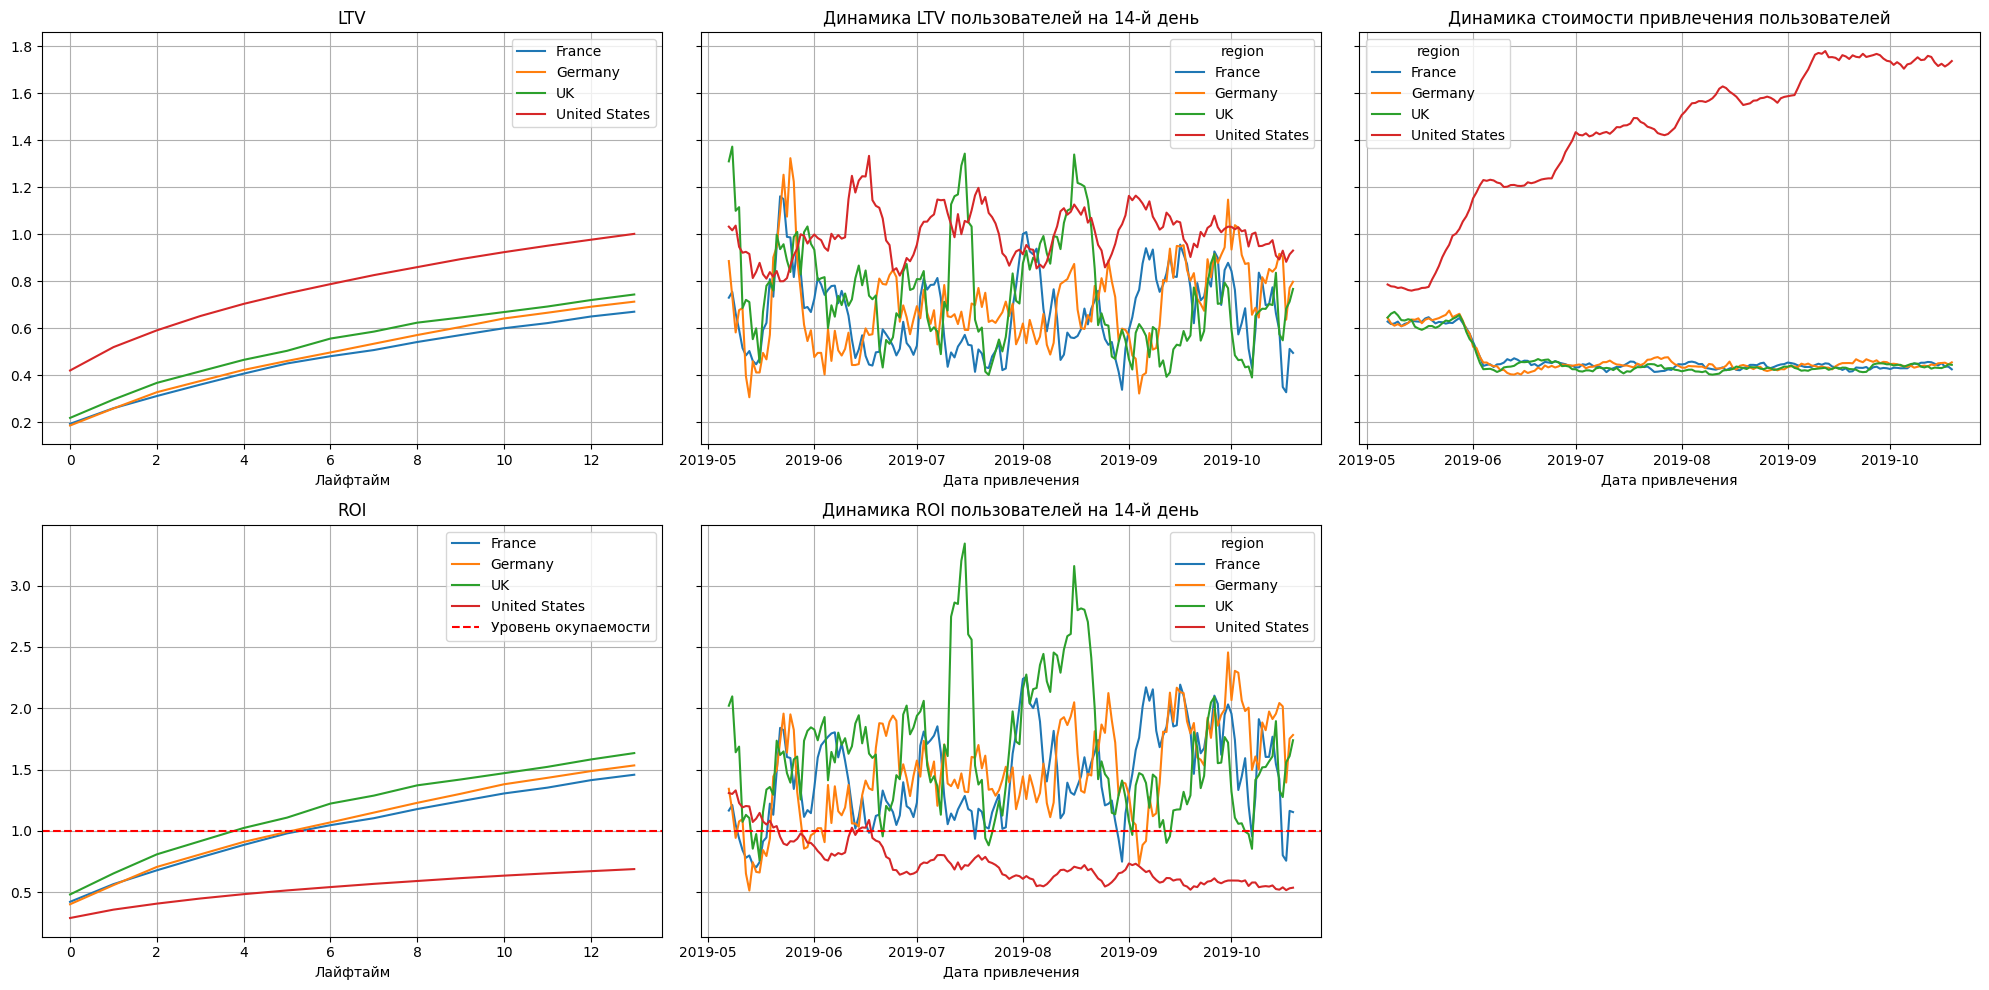

In [64]:
# Получим таблицы LTV и ROI c разделением по странам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
     profiles, orders, observation_date, analysis_horizon, dimensions=['region']
)
# Построим графики  
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon) 

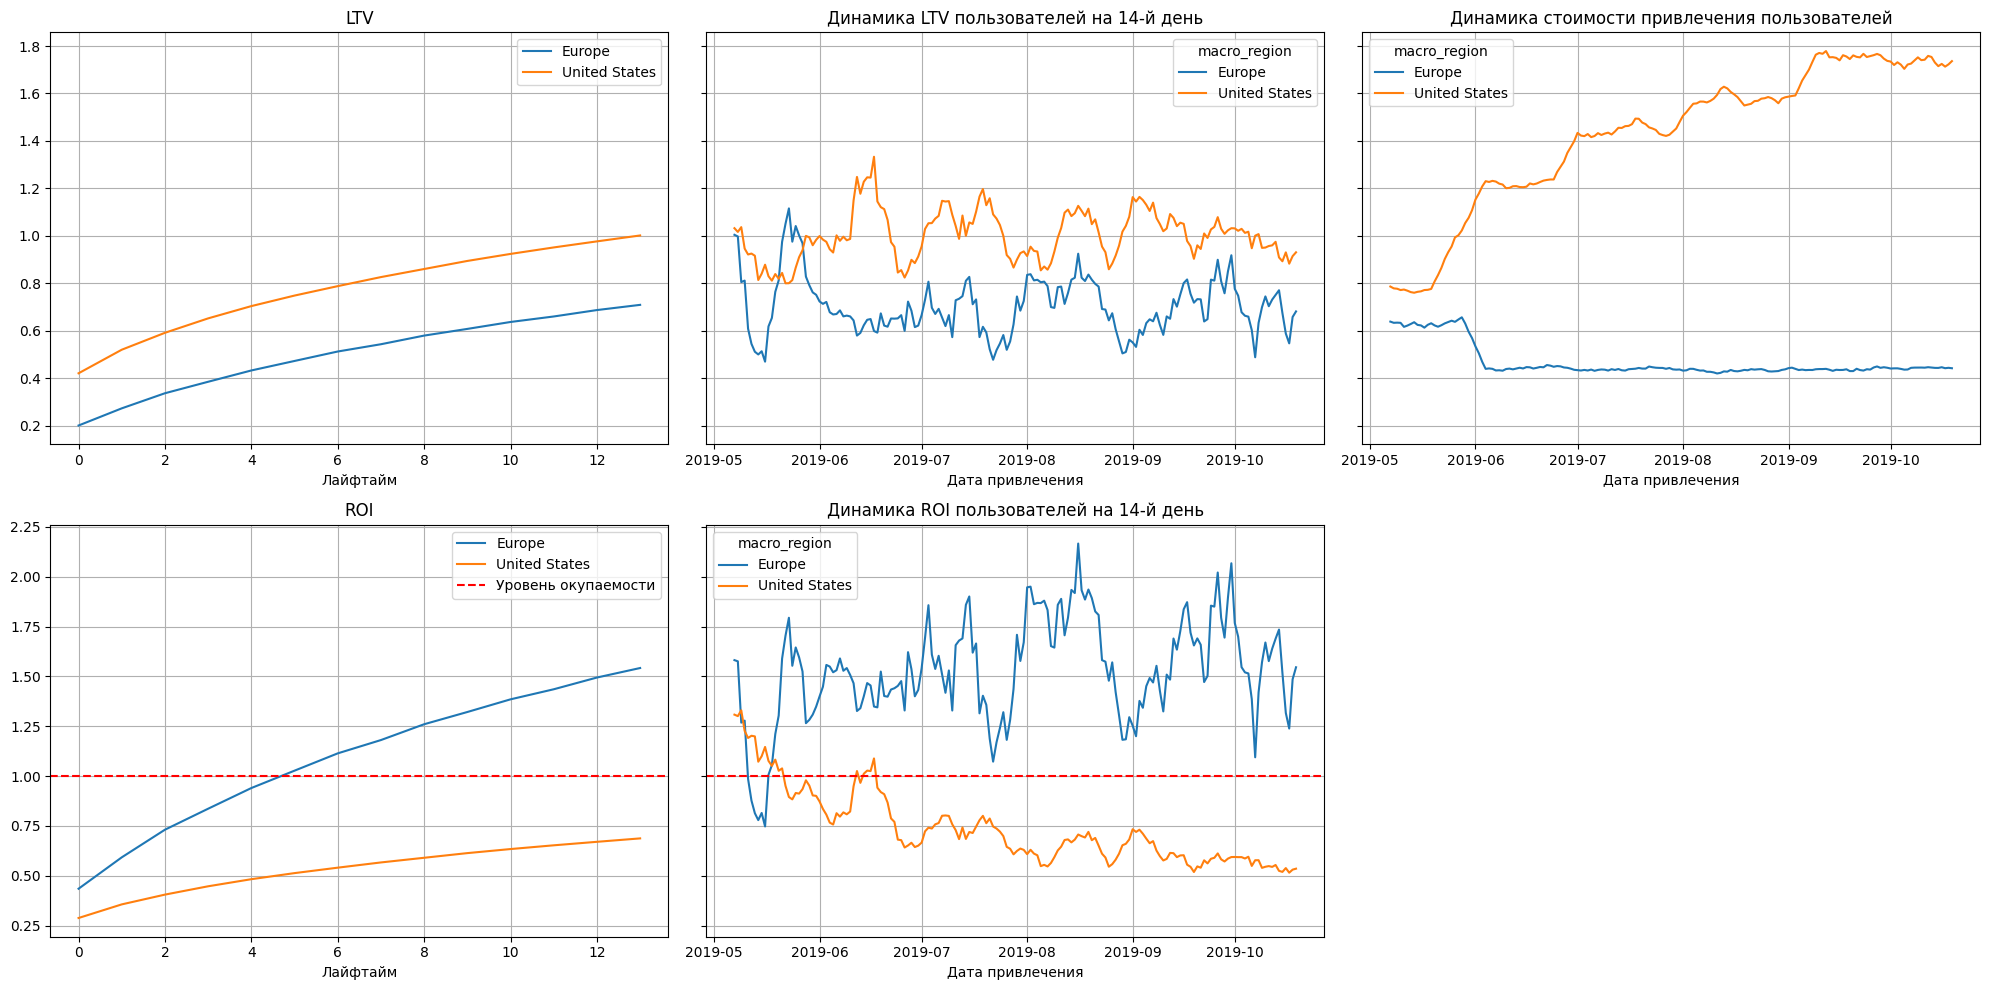

In [65]:
# Получим таблицы LTV и ROI c разделением по макро регионам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
     profiles, orders, observation_date, analysis_horizon, dimensions=['macro_region']
)
# Построим графики  
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

**Промежуточные выводы** Графики показывают, что реклама в Европейских странах окупается в 1,5р. А окупаемость рекламы в Америке не превышает 75%. В это же время траты на рекламу в Америке стремительно растут, а в Европейских странах плавно падают.

### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

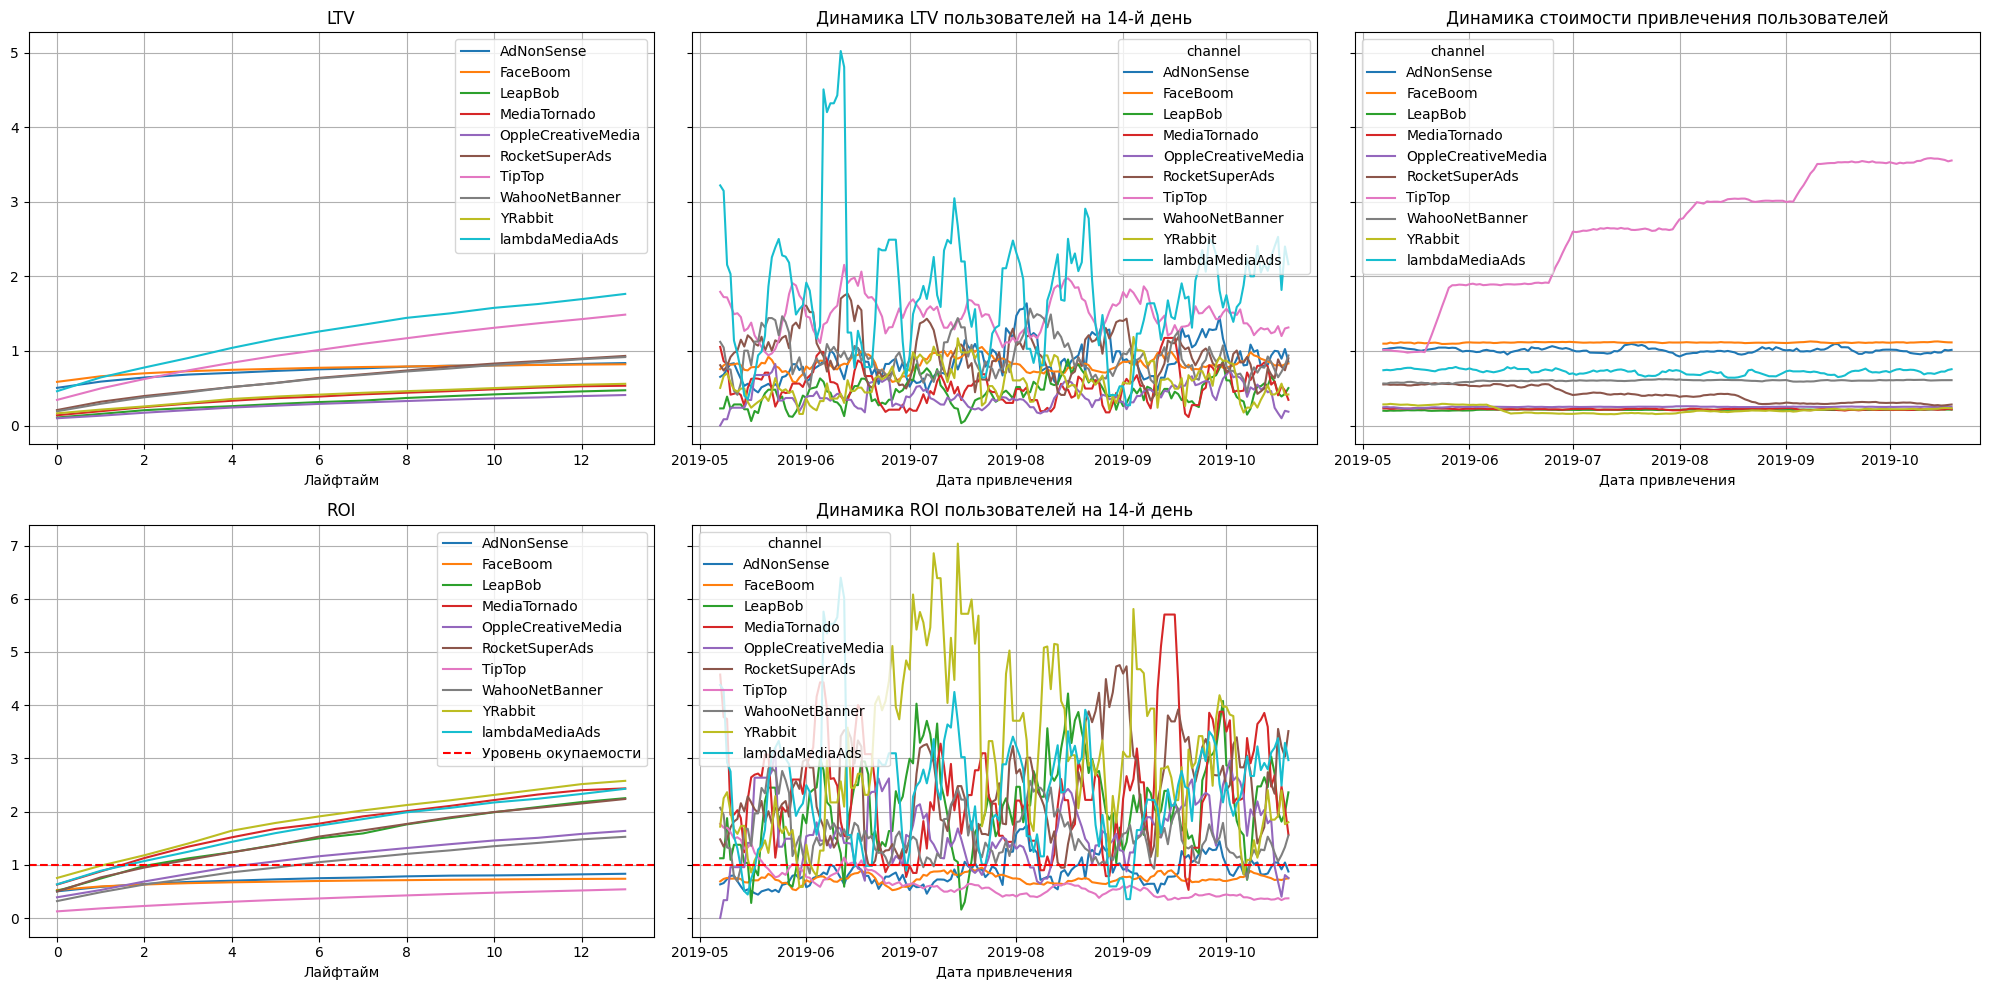

In [66]:
# Получим таблицы LTV и ROI c разделением по каналам привлечения 
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
     profiles, orders, observation_date, analysis_horizon, dimensions=['channel']
)
# Построим графики  
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon) 

**Промежуточные выводы** Окупаемость трех каналов из десяти не превысила порог в 100%, это каналы TipTop, FaceBoom и AdNonSense, в то время как траты на рекламу по всех каналам стабильны, кроме канала TipTop, для которого траты стремительно растут. 

### Вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

* Реклама на привелечение пользователей в целом не окупается, коэффициент ROI к концу исследуемого периода не превысил 80%. Траты на рекламу CAC постоянно растут. 
* При рассмотрении окупаемости по странам было высянено, что в Европейских странах реклама окупается, а в Америке нет.При разбивке по каналам выяснили, что реклама на трех каналах не окупается (AdNonSense - используемый в Европейских странах и TipTop и FaceBoom - испоьзуемые в Америке). Разбика по устрйоства показала, что реклама окупается только для пользователей устройства PC.
* Проблемы окупаемости могут быть вызваны слишком высокими тратами на рекламу для отдельных каналов.

## Выводы

Анализ маркетинговых показателей проводился для резвлекательного приложения Procrastinate Pro+. Рекламная компания проводилась в четырех странах:  Великобритании, Франции, Германии и США. Самое большое количество пользователей приложением в США - 100000 пользователей. Самая большая доля платящих пользователей так же приходится на США. Наиболее популярным устроиством, на котором используется приложение, является iPhone. Максимальное количество пользователей пришли самостоятельно (не с рекламных каналов). Максимальная доля платящих пользователей пришли с рекламного канала FaceBoom  и TipTop(54751.3).  Общая сумма расходов на рекламу составила 105497. Расчет трат на рекламу по регионам показал, что Европейские страны тратят примерно одинаковые суммы, которые примерно в 20 раз меньше трат на рекламу в Америке. Самые большие траты пришлись на источник TipTop (54751.3) и FaceBoom (32445.6$), оба этих источника используются в Америке. Привлечение одного клиента из канала TipTop обошлось в стреднем 2.75, из канала FaceBoom 1.11. Траты на рекламу на канале TipTop росли каждый месяц, на остальных канал были стабильными.В целом, реклама в привлечение пользователей не окупилась. В ходе анализа расходов и окупаемости было выявлены слишком большие траты на привлечение пользователей. После проведения анализа с разбивкой по каналам, странам и устройствам, стало видно, что только 3 канала из 10 не окупаются, пользователи устройства PC также превысили порог окупаемости. Рекомендации для отдела маркетинга развлекательного приложения Procrastinate Pro+: В Америке пользователи всех устройств не принесли окупаемости рекламы, не смотря на постоянный рост трат на рекламу. Рекомендуется сократить  расходы на рекламу на каналах TipTop и FaceBoom.